# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'

# Loading the dataset

In [2]:
automobile = pd.read_csv('/Users/marwahfaraj/Desktop/dsi_galvanize/project/Exploratory_Data_Analysig_using_Python_for_Automobile/Automobile_data.csv')
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


# Read the dataset

# listing the data coloumns

In [3]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# showing the data set information

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# showing the statstics of the data set

In [5]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.76,6.02,86.6,94.5,97.0,102.4,120.9
length,205.0,174.05,12.34,141.1,166.3,173.2,183.1,208.1
width,205.0,65.91,2.15,60.3,64.1,65.5,66.9,72.3
height,205.0,53.72,2.44,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.57,520.68,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.91,41.64,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.14,3.97,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.22,6.54,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.75,6.89,16.0,25.0,30.0,34.0,54.0


# Cleaning the data

After descibing the data I found some coloumn is missing

In [6]:
automobile.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

After checking null values it appers that there is no null value but why some columns still missing

# Targeting the coloumns 


targeting 'normalized-losses' cloumn and found '?' in it

In [7]:
automobile['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
104     6
134     6
168     5
103     5
95      5
85      5
65      5
94      5
74      5
102     5
122     4
118     4
106     4
148     4
93      4
83      3
125     3
101     3
154     3
137     3
115     3
119     2
164     2
153     2
87      2
194     2
192     2
158     2
197     2
188     2
129     2
81      2
108     2
89      2
110     2
145     2
113     2
186     1
121     1
142     1
78      1
256     1
98      1
77      1
231     1
90      1
107     1
Name: normalized-losses, dtype: int64

trgeting 'num-of-doors' coloumn and found '?' in it

In [8]:
automobile['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Replace the coulmn values with their respective numeric values.

In [9]:
automobile['num-of-doors'] = automobile['num-of-doors'].replace({'four':4, 'two':2, '?':4})
automobile['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

Notice the 'num-of-cylinders' column also the value need to be changed to the respective numeric value

In [10]:
automobile['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [11]:


automobile['num-of-cylinders'] = automobile['num-of-cylinders'].replace({'twelve':12, 'eight':8, 'six':6, 'five':5, 'four':4, 'three':3, 'two':2})
automobile['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

targeting horsepower coloumn and found '?' in it

In [12]:
automobile.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
88      6
62      6
101     6
84      5
145     5
82      5
76      5
102     5
97      5
111     4
123     4
86      4
92      4
85      3
121     3
207     3
152     3
90      3
73      3
182     3
155     2
184     2
112     2
161     2
94      2
100     2
162     2
?       2
176     2
156     2
52      2
56      2
78      1
142     1
115     1
288     1
134     1
58      1
140     1
60      1
175     1
72      1
120     1
106     1
55      1
200     1
135     1
143     1
48      1
154     1
64      1
262     1
Name: horsepower, dtype: int64



targeting 'Price' column and analysis it and found ther is '?' in it

In [13]:
automobile.price.value_counts()


?        4
7957     2
7898     2
8921     2
18150    2
        ..
9639     1
7738     1
7099     1
15690    1
12940    1
Name: price, Length: 187, dtype: int64

# Replacing '?' with null value
then I can convert it to numerical type variable, and perform statistical operations on it like calculating mean, mode, median etc.
Using those values, we can impute the missing data.

In [14]:
automobile = automobile.replace('?', np.nan)
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,NaN


# After converting to null value now checking the data info agian

I found the coloumne it has the most nan values is normalized-losses and decided to pop it out and then drop the null value from the table

In [15]:
# automobile.pop('normalized-losses')
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

# Droping the null value

In [16]:
automobile.dropna(inplace=True)
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    object 
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       160 non-null    int64  
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    int64  
 16  engine-size        160 non

# Convert the dtypes in into appropriate types

In [17]:
for col in automobile.select_dtypes(include="object"):
    try:
        automobile[[col]] = automobile[[col]].astype(str).astype(float)
    except:
        pass

In [18]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    float64
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       160 non-null    int64  
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    int64  
 16  engine-size        160 non

Yes I convert them but for couble check

In [19]:
automobile.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi
6,audi,gas,std,sedan,fwd,front,ohc,mpfi
8,audi,gas,turbo,sedan,fwd,front,ohc,mpfi
10,bmw,gas,std,sedan,rwd,front,ohc,mpfi


Now do data describe agian to see the missing coloumns 

In [29]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,160.0,0.74,1.19,-2.00,0.00,1.00,2.00,3.00
normalized-losses,160.0,121.30,35.60,65.00,94.00,114.00,148.00,256.00
num-of-doors,160.0,3.20,0.98,2.00,2.00,4.00,4.00,4.00
wheel-base,160.0,98.24,5.16,86.60,94.50,96.90,100.60,115.60
length,160.0,172.32,11.55,141.10,165.52,172.20,177.80,202.60
width,160.0,65.60,1.95,60.30,64.00,65.40,66.50,71.70
height,160.0,53.88,2.28,49.40,52.00,54.10,55.50,59.80
curb-weight,160.0,2459.45,480.90,1488.00,2073.25,2338.50,2808.75,4066.00
num-of-cylinders,160.0,4.24,0.67,3.00,4.00,4.00,4.00,8.00
engine-size,160.0,119.09,30.41,61.00,97.00,110.00,134.50,258.00


# Showing the distribution of the price by useing the mean

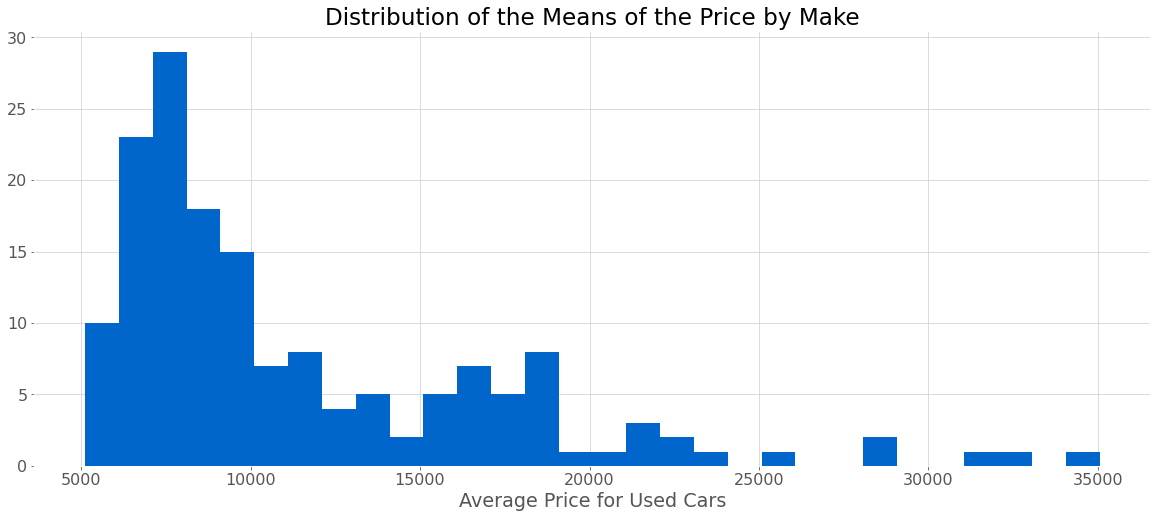

In [21]:
automobile.groupby('make').mean().round(2).T
fig, ax=plt.subplots()
ax.hist(automobile.price, color='#0066cc', bins=30)
ax.set_title('Distribution of the Means of the Price by Make')
ax.set_xlabel("Average Price for Used Cars");


# corellation matrix

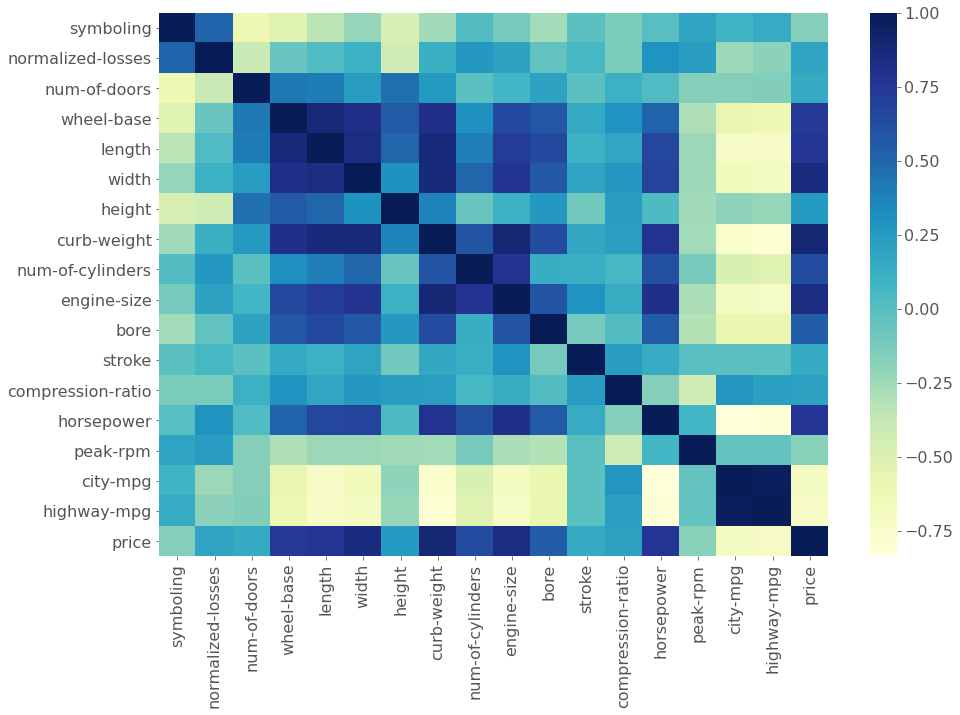

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile.corr(),annot = False, cmap='YlGnBu');

# Zooming into the correlation between the Price and Symboling, Horsepower, and Engine size.

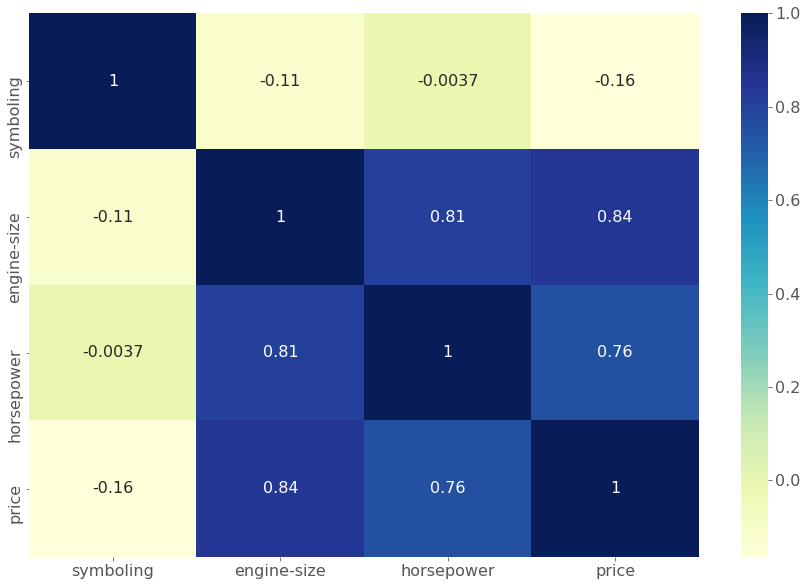

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile[['symboling','engine-size','horsepower','price']].corr(),annot = True, cmap='YlGnBu');

# Ntice that the price is direclty correlated with the horsepwer and engine size

# How many cars each Manufacterer has

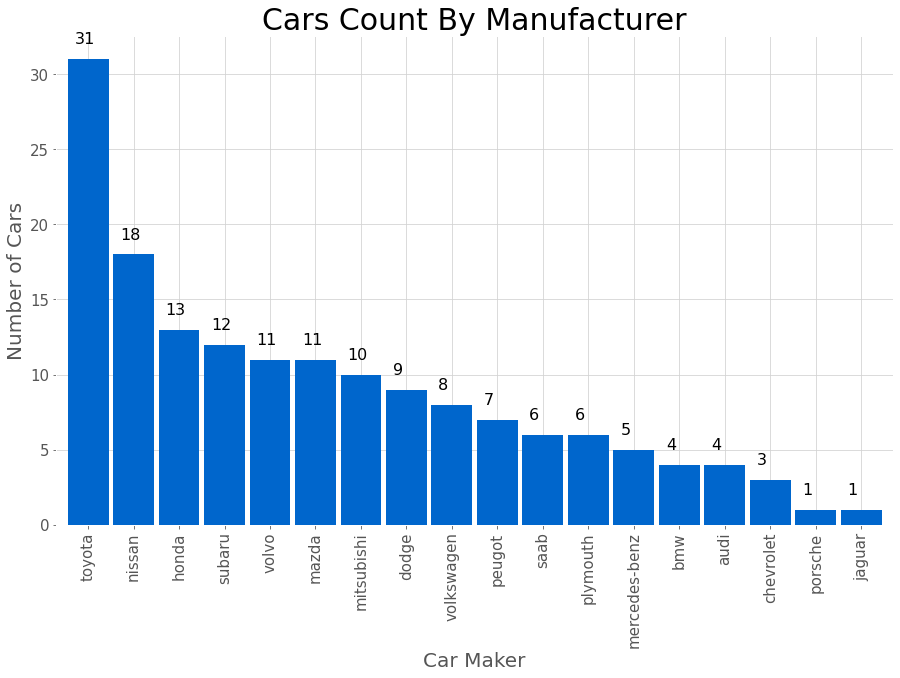

In [24]:
fig, ax=plt.subplots(figsize=(15,9))
ax=automobile['make'].value_counts().plot.bar(width=0.9, color='#0066cc', align='center', zorder=3)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()


there is more Japanese Cars in the Dataset followed by European.Toyota,Nissan,Mazda and Honda are all Japanese car makers,This is due customers prefered smaller and more fuel efficient cars made by the japanese car makers, and Found Toyota has more car thaan any other car in the data.

# Showing how many Japanese cars in the dataset in comparision to the total number of cars

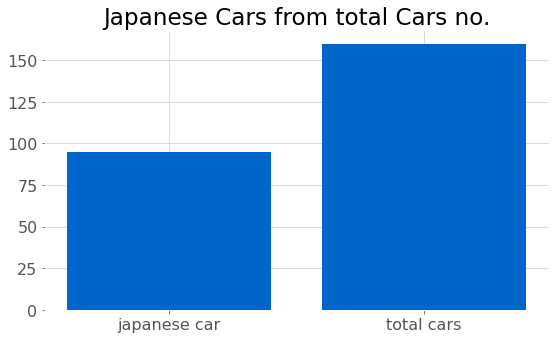

In [25]:
# the japanese car are Toyota, Honda, Nissan, Mazda, Mitsubishi, Subaru, Isuzu.
japanese_car=(automobile.loc[automobile.make == 'toyota', 'make'].count() +\
  automobile.loc[automobile.make == 'nissan','make'].count() +\
automobile.loc[automobile.make == 'mazda', 'make'].count() +\
automobile.loc[automobile.make == 'honda', 'make'].count() +\
    automobile.loc[automobile.make == 'mitsubishi', 'make'].count() +\
automobile.loc[automobile.make == 'subaru', 'make'].count() +\
    automobile.loc[automobile.make == 'isuzu','make'].count())
total_car=len(automobile.make)
fig, ax=plt.subplots(figsize=(8, 5))
width=0.9
x=['japanese car','total cars']
y=[95, 160]
ax.bar(x,y,color='#0066cc')
plt.title('Japanese Cars from total Cars no.')
plt.tight_layout();

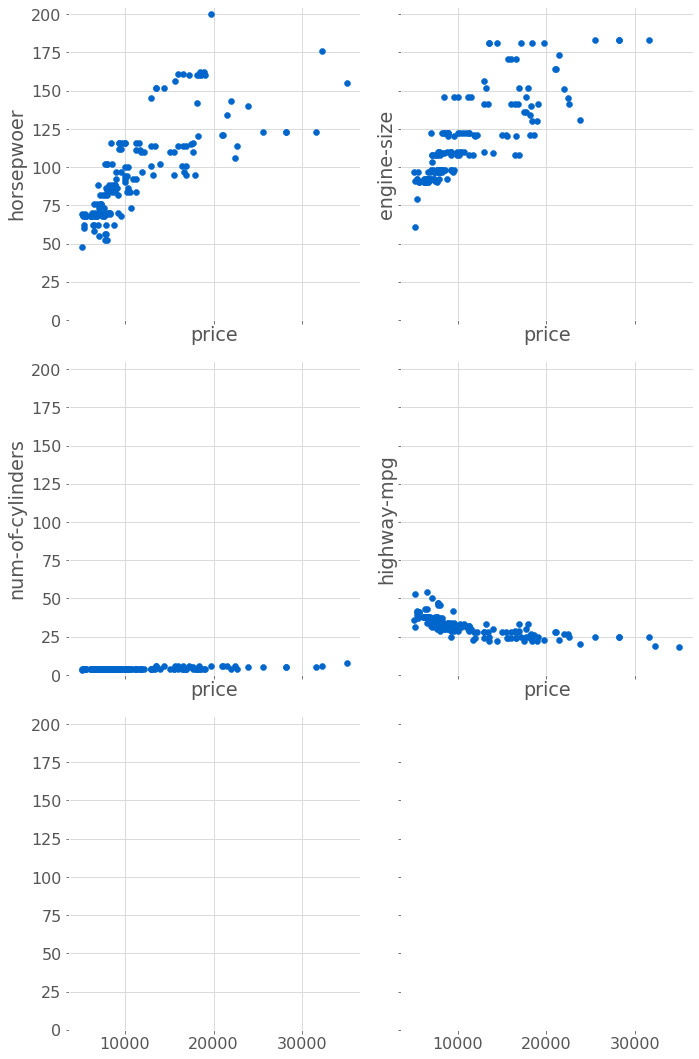

In [37]:
fig, axes = plt.subplots(figsize=(10,15),nrows = 3, ncols = 2, sharex=True, sharey = True)
plt.grid()
axes[0][0].scatter(automobile.price, automobile.horsepower, color='#0066cc', marker = "o")
axes[0][0].set_xlabel('price', labelpad = 5)
axes[0][0].set_ylim(0,205)
axes[0][0].set_ylabel('horsepwoer', labelpad=5)

axes[0][1].scatter(automobile.price, automobile['engine-size'], color='#0066cc', marker = "o")
axes[0][1].set_xlabel('price', labelpad = 5)
axes[0][1].set_ylim(0,205)
axes[0][1].set_ylabel('engine-size', labelpad=5)

axes[1][0].scatter(automobile.price, automobile['num-of-cylinders'], color='#0066cc', marker = "o")
axes[1][0].set_xlabel('price', labelpad = 5)
axes[1][0].set_ylabel('num-of-cylinders', labelpad=5)

axes[1][1].scatter(automobile.price, automobile['highway-mpg'],  color='#0066cc', marker = "o")
axes[1][1].set_xlabel('price', labelpad = 5)
axes[1][1].set_ylabel('highway-mpg', labelpad=5)
# num-of-cylinders
plt.tight_layout();



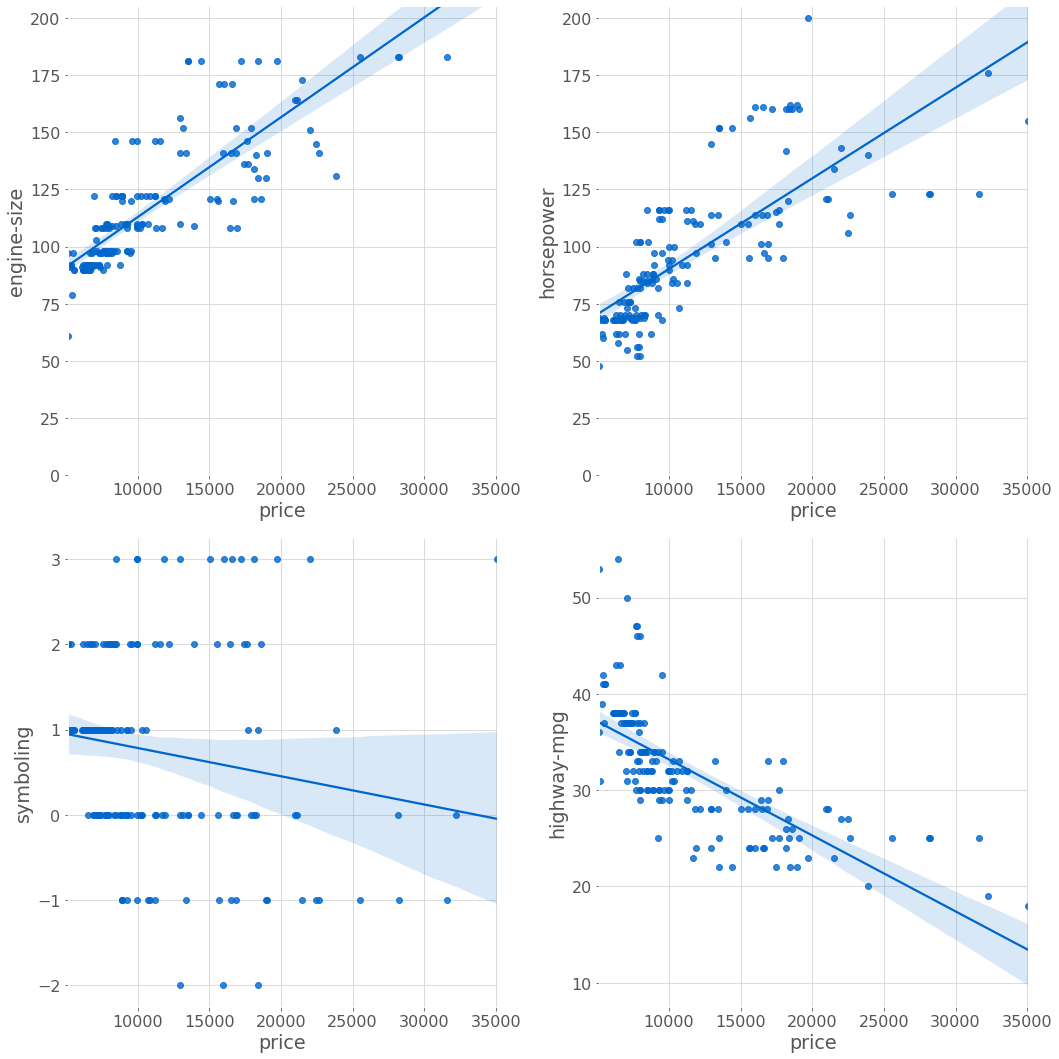

In [42]:

fig, axs = plt.subplots(figsize=(15,15),ncols=2, nrows= 2)
engine_size=sns.regplot(x='price', y='engine-size',color='#0066cc', data=automobile, ax=axs[0][0])
# engine_size.set(ylim=(0,205))
horse_power=sns.regplot(x='price', y='horsepower', color='#0066cc', data=automobile, ax=axs[0][1])
# horse_power.set(ylim=(0,205))
symboling=sns.regplot(x='price',y='symboling',color='#0066cc', data=automobile, ax=axs[1][0])

highway_mpg=sns.regplot(x='price',y='highway-mpg', color='#0066cc', data=automobile, ax=axs[1][1])

plt.tight_layout()
plt.show();



